In [33]:
import matplotlib
import numpy as np
import pandas as pd
import calendar as cal
import matplotlib.pyplot as plt

In [56]:
#import data
fires = pd.read_csv('forestfires.csv', sep=",")   
#fires = pd.read_csv('fhttp://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv', sep=",") 

In [35]:
fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [57]:
#Turn variable 'month' and 'day' from string to number
month_to_num_dict = {key.lower(): value for value, key in enumerate(cal.month_abbr)}
day_to_num_dict = {key.lower(): value for value, key in enumerate(cal.day_abbr)}


grouped = fires.groupby('month')
for group in grouped:
    fires.replace(group[0], month_to_num_dict[group[0]], inplace=True)
    

grouped = fires.groupby('day')
for group in grouped:
    fires.replace(group[0], day_to_num_dict[group[0]]+1, inplace=True)

In [38]:
fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


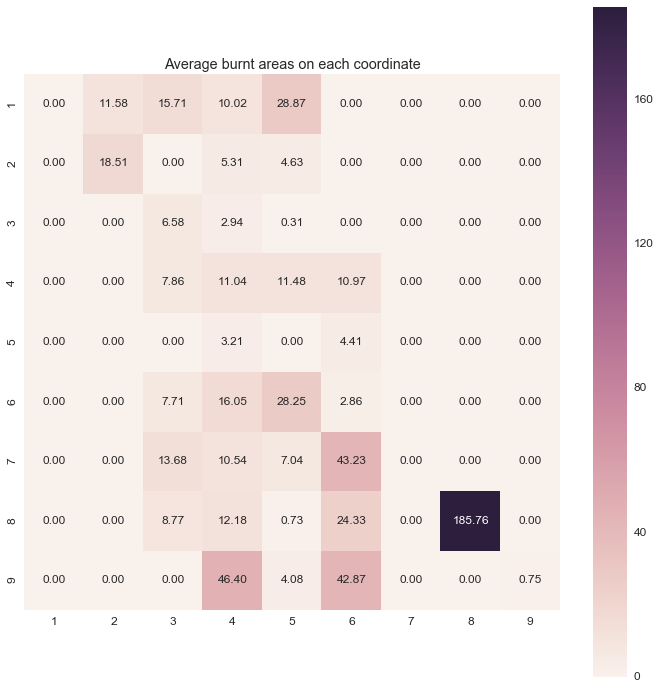

In [39]:
#Visualize fires destiny
%matplotlib inline
import seaborn as sns

cols = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
firefrequency,firearea,fireaverage = np.full((9, 9), 0.0),np.full((9, 9), 0.0),np.full((9, 9), 0.0)

for row in range(0, fires.shape[0]):
    x,y = fires['X'][row]-1,fires['Y'][row]-1
    firefrequency[x, y] += 1
    firearea[x, y] += fires['area'][row]

for (x, y), value in np.ndenumerate(firefrequency):
    if (firefrequency[x, y] != 0):
        fireaverage[x, y] = firearea[x, y]/firefrequency[x, y]

f, axes = plt.subplots(1, 1, figsize=(12, 12), sharex=True)
sns.set(font_scale=1.2)
heat_map = sns.heatmap(fireaverage,
                       cbar=True,
                       annot=True,
                       square=True,
                       fmt='.2f',
                       annot_kws={'size': 12},
                       yticklabels=cols,
                       xticklabels=cols)
plt.title('Average burnt areas on each coordinate')
plt.show()



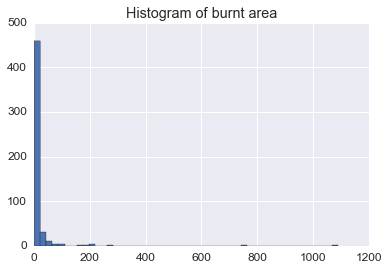

In [40]:
#Take a further look at 'area'
%matplotlib inline
fires['area'].hist(bins=50)
plt.title('Histogram of burnt area')
plt.show()

It's easy to find that 'area' is seriously right-skewed. To reduce skewness and improve symmetry, the logarithm function y = ln(x + 1).

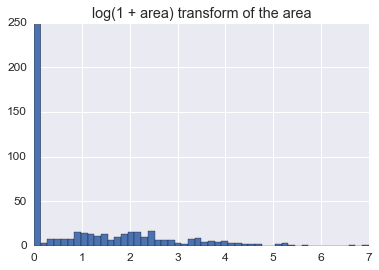

In [41]:
#Test transformed 'area'
%matplotlib inline
area_transform = np.log(1 + fires['area'])
area_transform.hist(bins=50)
plt.title('log(1 + area) transform of the area')
plt.show()


Since the variable 'day' seems to be irrelevant to the forest fires, we delete 'day'. In other words, the forest fires may have some connections to 'month' because it may involve in some seasonal factors but it almost has nonthing to do with whether it is Monday or Tuesday.

In [58]:
#Delete 'day' and transform 'area'
del fires['day']
fires['area'] = np.log(1 + fires['area'])
fires.head()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


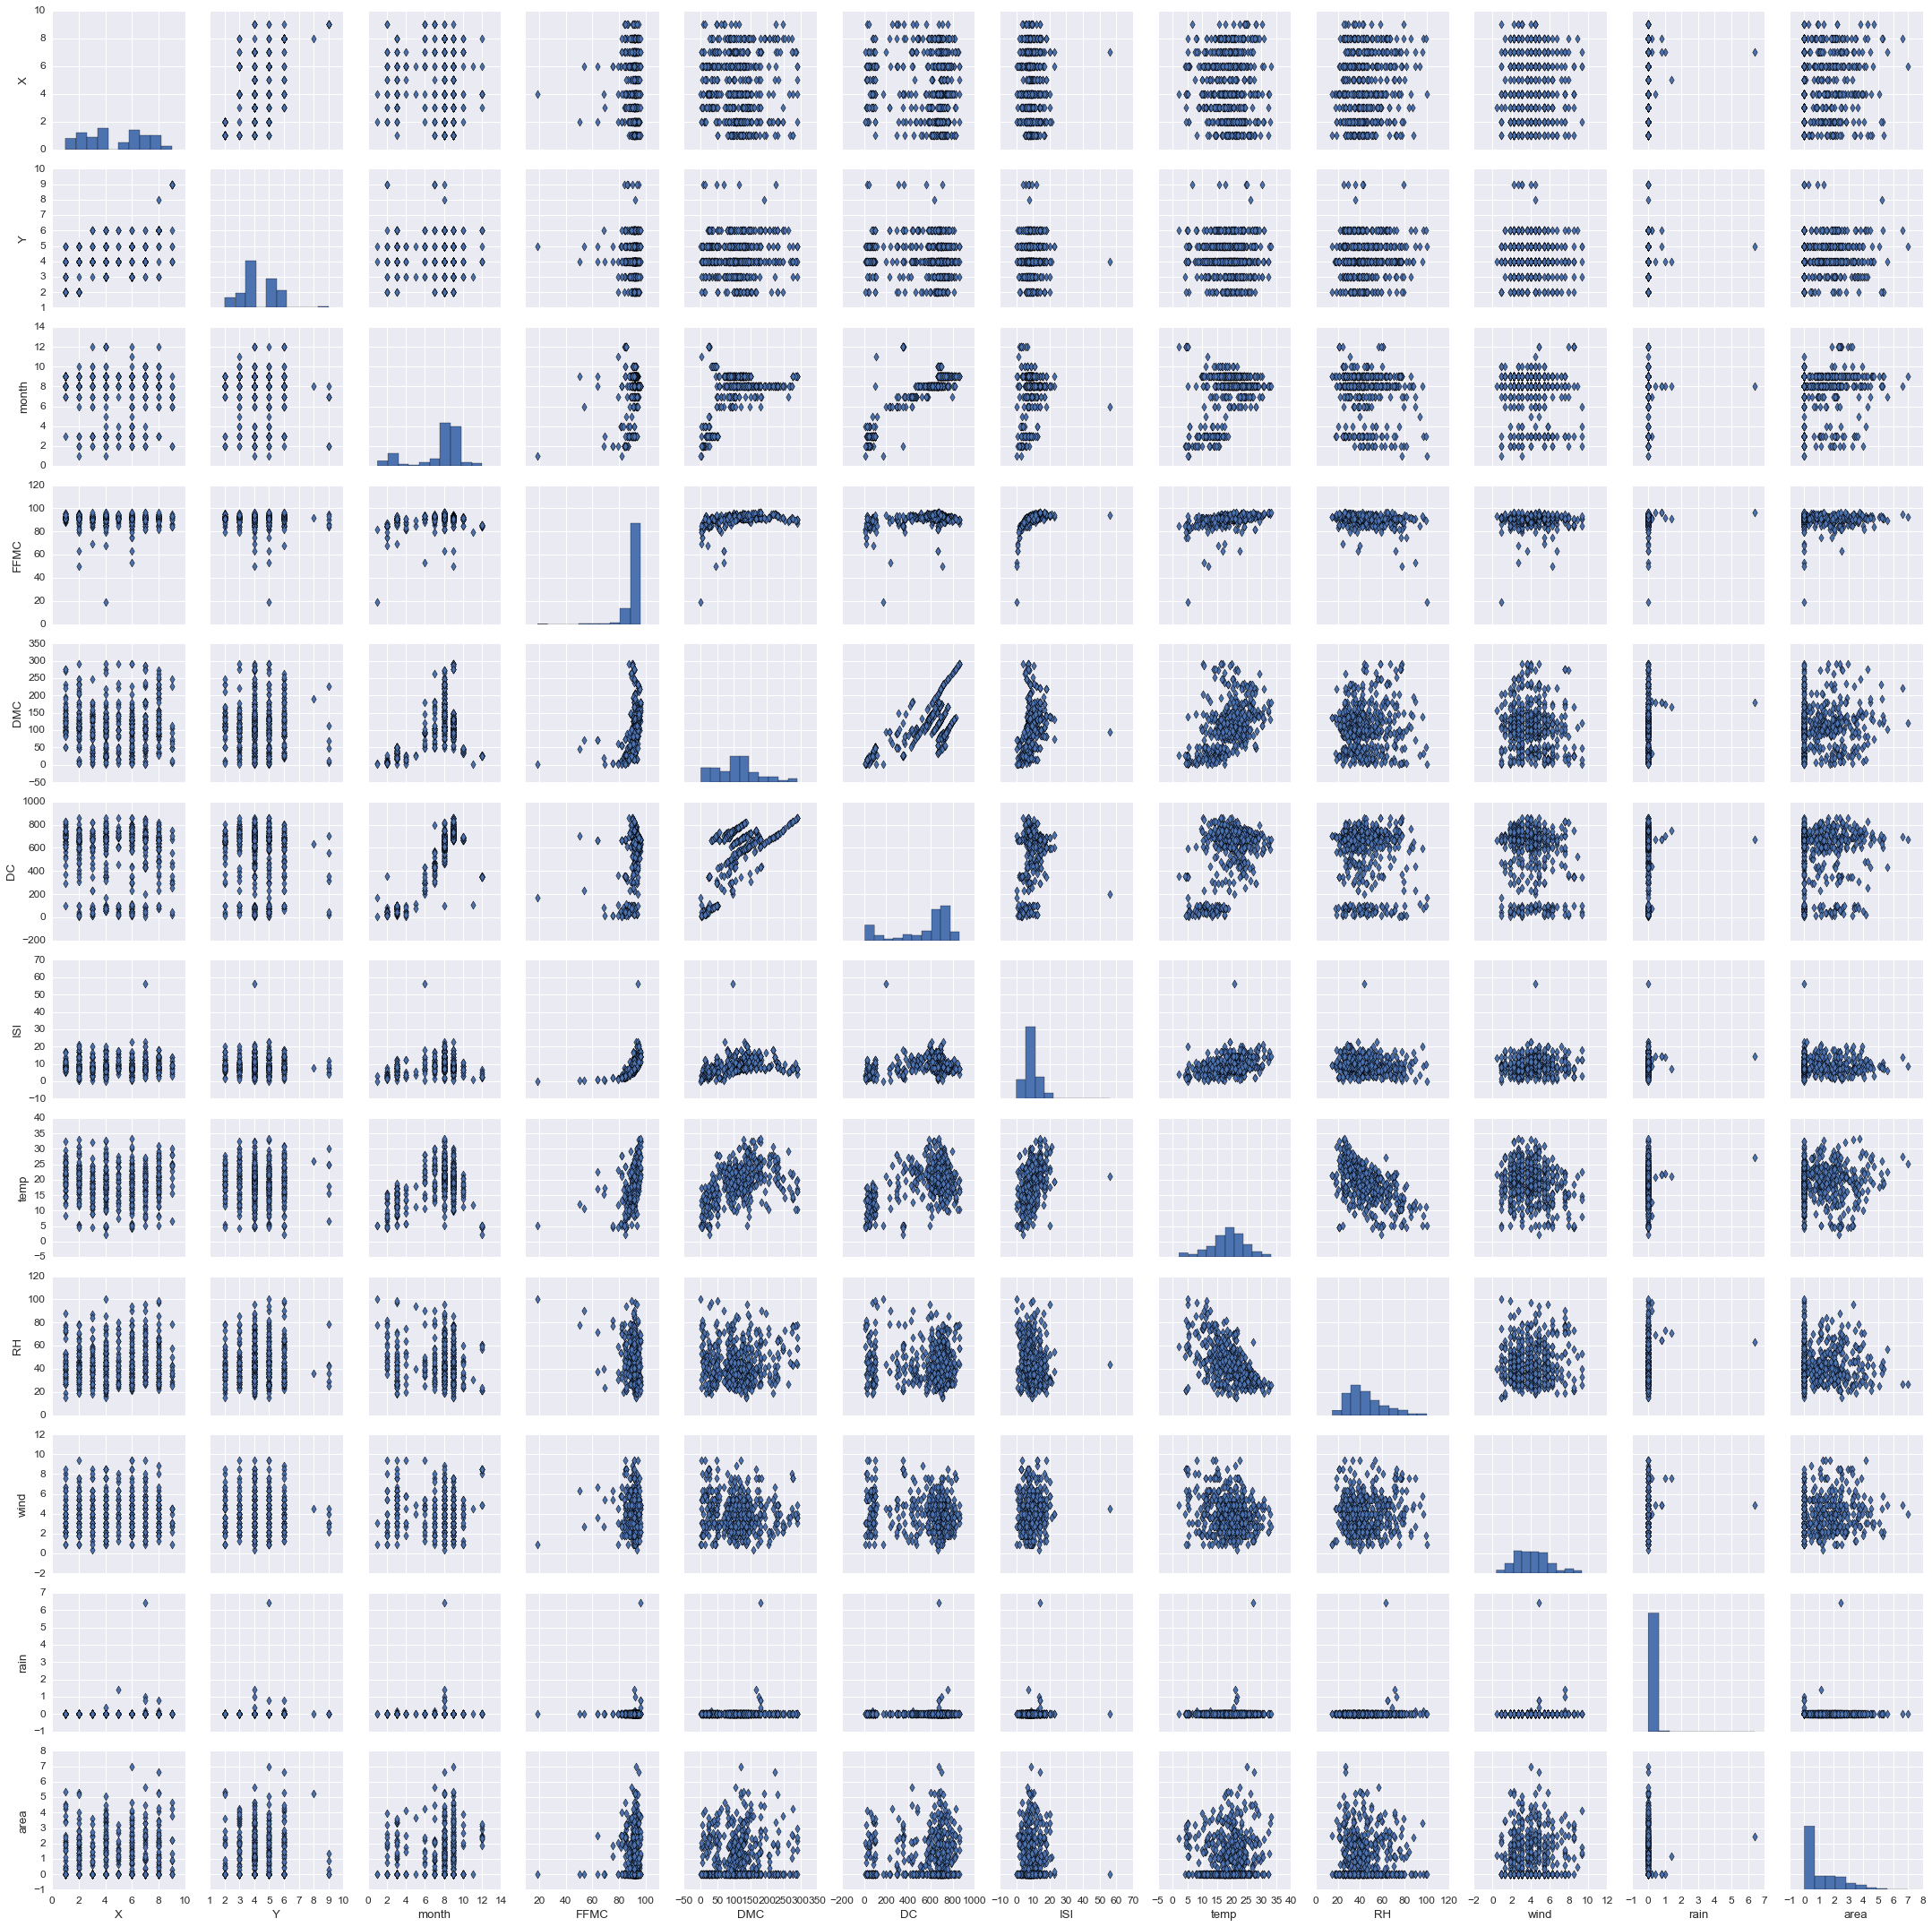

In [43]:
#Visualize data
%matplotlib inline

g=sns.pairplot(fires, markers='d', size=2.5, plot_kws=
    {"s":40,
    "alpha":1.0,
    'lw':0.5,
    'edgecolor':'k'})
plt.show()

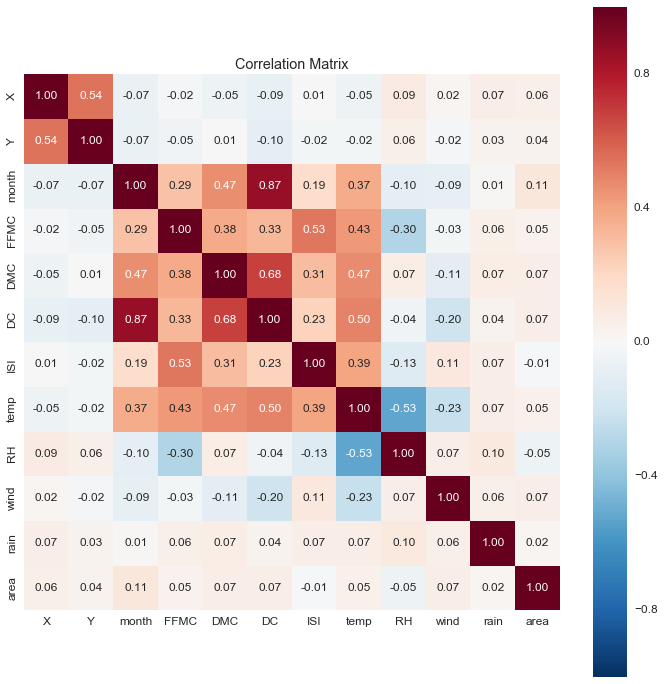

In [44]:
#See the correlation matrix
%matplotlib inline

f, axes = plt.subplots(1, 1, figsize=(12, 12), sharex=True)
cols=fires.columns
cormat = np.corrcoef(fires[cols].values.T)
sns.set(font_scale=1.2)
heatmap = sns.heatmap(cormat,
                       cbar=True,
                       annot=True,
                       square=True,
                       fmt='.2f',
                       annot_kws={'size': 12},
                       yticklabels=cols,
                       xticklabels=cols)
plt.title('Correlation Matrix')
plt.show()

In [59]:
#Standardize data
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

y = (fires['area'].values > 0)
X = fires.iloc[:,0:-1]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)
    
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
pd.DataFrame(X_train_std).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,361.0,6.950427e-17,1.001388,-1.538023,-0.682512,-0.254757,1.028508,1.884019
1,361.0,3.063108e-16,1.001388,-1.835773,-0.225289,-0.225289,0.579953,3.800921
2,361.0,-1.550776e-16,1.001388,-2.802964,-0.193931,0.240908,0.675747,1.980263
3,361.0,-1.997786e-15,1.001388,-12.909411,-0.077594,0.155386,0.388366,0.979777
4,361.0,-1.407000e-16,1.001388,-1.705550,-0.843465,-0.041851,0.485323,2.773878
5,361.0,-1.734531e-16,1.001388,-2.133283,-0.443324,0.477782,0.684381,1.253029
6,361.0,8.672656e-17,1.001388,-1.903317,-0.536900,-0.137486,0.346015,9.889910
7,361.0,6.027804e-17,1.001388,-2.845060,-0.574035,0.091904,0.672467,2.431231
8,361.0,2.404971e-16,1.001388,-1.760748,-0.727006,-0.179730,0.549971,3.407965
9,361.0,-2.283492e-16,1.001388,-1.690435,-0.692303,0.028571,0.527637,3.022967


Method: Linear Regression
Train accuracy: 0.548
Test  accuracy: 0.551


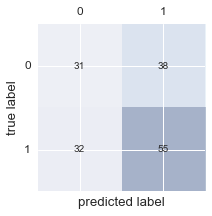

In [46]:
#Linear Regression
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.metrics import confusion_matrix

lir = LinearRegression()
lir.fit(X_train_std,y_train)
y_train_pred,y_test_pred= lir.predict(X_train_std),lir.predict(X_test_std)

#turn the regression result into 0 and 1
y_train_pred[y_train_pred >= 0.5],y_test_pred[y_test_pred >= 0.5] = 1,1
y_train_pred[y_train_pred < 0.5],y_test_pred[y_test_pred < 0.5] = 0,0

print('Method: Linear Regression\nTrain accuracy: %.3f\nTest  accuracy: %.3f' % (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))

#test Confusion Matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    
plt.xlabel('predicted label')
plt.ylabel('true label')
#plt.title('Test Confusion Matrix')
plt.show()

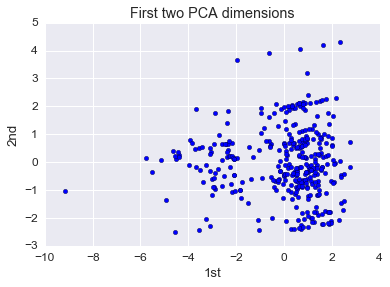

[ 0.29883236  0.14148877]


In [23]:
#PCA analysis
%matplotlib inline
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.title('First two PCA dimensions')
plt.xlabel('1st')
plt.ylabel('2nd')
plt.show()
print(pca.explained_variance_ratio_)

In [47]:
#define learning_curve_plot function
def learning_curve_plot(clf,X,y,clfname):        
    train_sizes, train_scores, test_scores =\
                learning_curve(estimator=clf,
                               X=X,
                               y=y,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean,
             color='blue', marker='o',
             markersize=5, label='Training accuracy')

    plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean,
             color='green', linestyle='--',
             marker='s', markersize=5,
             label='Test accuracy')

    plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='green')

    plt.grid()
    plt.title(clfname)
    plt.xlabel('Training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.ylim([0.4, 1.1])
    plt.tight_layout()
    plt.show()
    return

Method: logistic regression (n=11)
Training accuracy: 0.548
Test  accuracy: 0.558


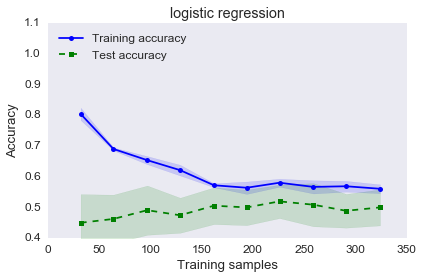

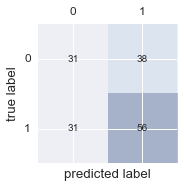

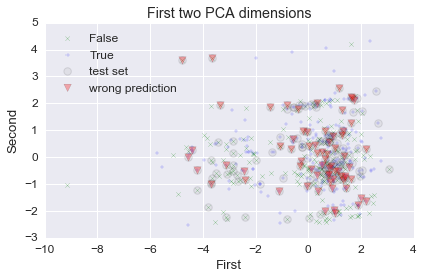

Method: svm.linear (n=11)
Training accuracy: 0.593
Test  accuracy: 0.545


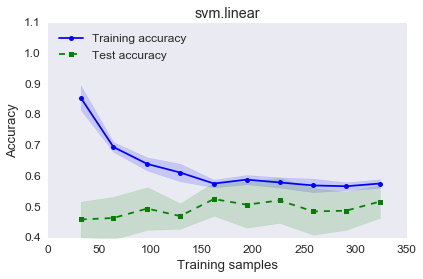

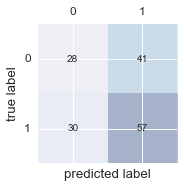

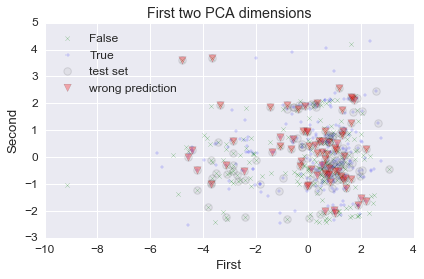

Method: svm.poly (n=11)
Training accuracy: 0.776
Test  accuracy: 0.577


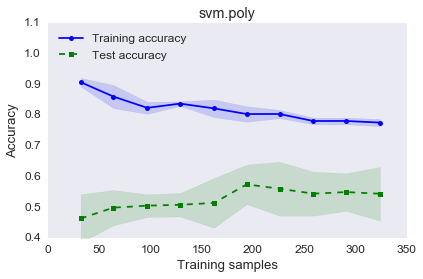

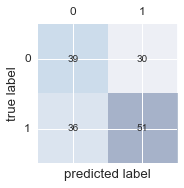

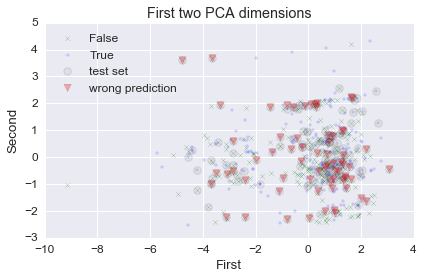

Method: svm.rbf (n=11)
Training accuracy: 0.767
Test  accuracy: 0.532


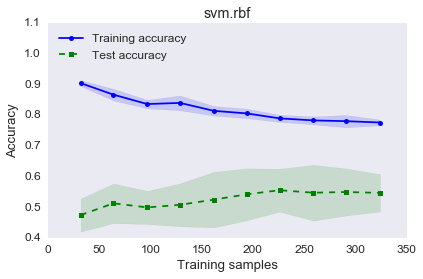

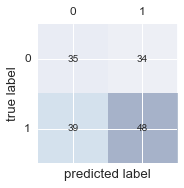

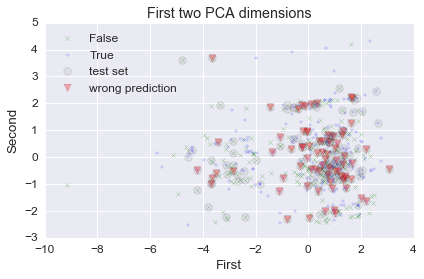

Method: svm.sigmoid (n=11)
Training accuracy: 0.449
Test  accuracy: 0.494


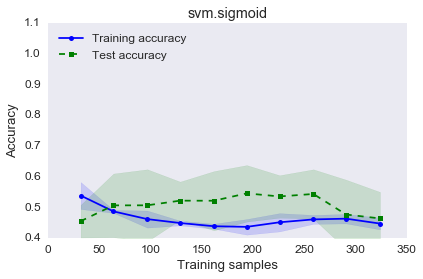

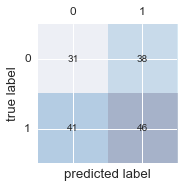

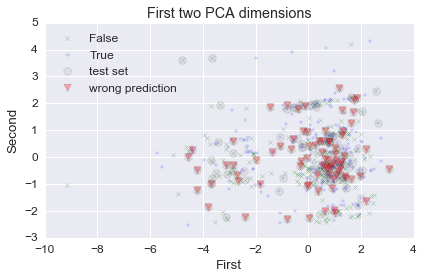

In [60]:
#Try logistic regression and SVM with all components (n=11)
%matplotlib inline
from sklearn.pipeline import Pipeline
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.learning_curve import learning_curve


method = [
              ('logistic regression', LogisticRegression(random_state=1)),\
              ('svm.linear', svm.SVC(kernel='linear', gamma=0.2)),\
              ('svm.poly',svm.SVC(kernel='poly', gamma=0.2)),\
              ('svm.rbf',svm.SVC(kernel='rbf',gamma=0.2)),\
              ('svm.sigmoid',svm.SVC(kernel='sigmoid',gamma=0.2)),\

              ]
X_std = stdsc.transform(X)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
X_pca = pca.transform(X_std)


for i in range(len(method)):
    pipe_cl = Pipeline([('scl', StandardScaler()),
                    method[i]])

    pipe_cl.fit(X_train, y_train)
    print('Method: %s (n=11)' % method[i][0])
    print('Training accuracy: %.3f\nTest  accuracy: %.3f' % (pipe_cl.score(X_train, y_train),pipe_cl.score(X_test, y_test)))

 
    learning_curve_plot(pipe_cl, X_train, y_train, method[i][0])
    
    y_pred = pipe_cl.predict(X_test)

    #plot confusion matrix
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')
    wrong_y = (y_test!=y_pred)

    fig = plt.figure()      
    markers = ('x',  '+')
    colors = ('green',  'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    for idx, cl in enumerate(np.unique(y)):

        plt.scatter(x=X_pca[y == cl, 0], y=X_pca[y == cl, 1],
                alpha=0.5, c=cmap(idx),
                marker=markers[idx], label=cl)

    plt.scatter(X_test_pca[:, 0],
            X_test_pca[:, 1],
            c='grey',
            alpha=0.1,
            linewidths=1,
            marker='o',
            s=55, label='test set')

    plt.scatter(x=X_test_pca[wrong_y==True,0],\
                y=X_test_pca[wrong_y==True,1],\
                c='red',
                alpha=0.3,
                marker='v',
                s=55, label='wrong prediction')


    plt.title('First two PCA dimensions')
    plt.xlabel('First')
    plt.ylabel('Second')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()




Method(n=11): logistic regression 
Training accuracy: 0.543
Test  accuracy: 0.519


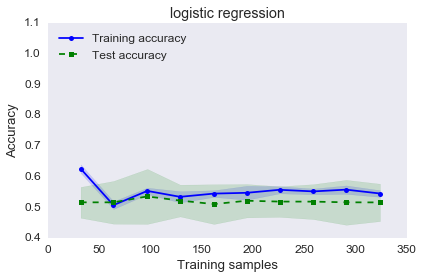

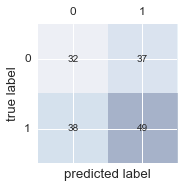

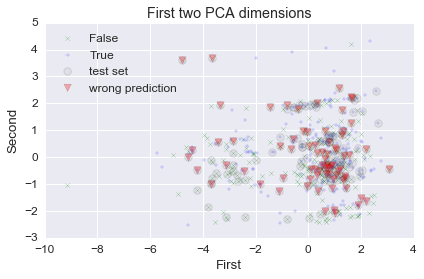

Method(n=11): svm.linear 
Training accuracy: 0.537
Test  accuracy: 0.487


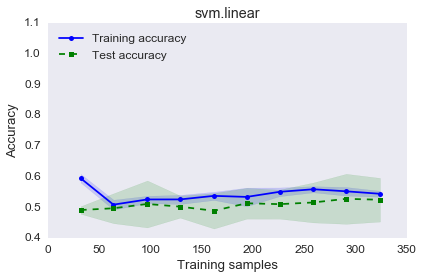

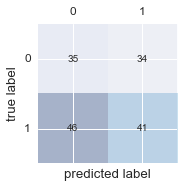

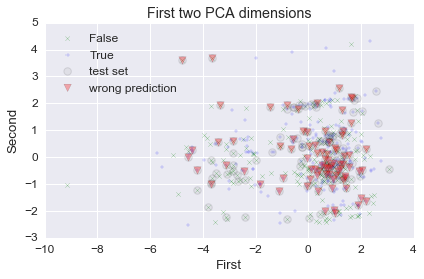

Method(n=11): svm.poly 
Training accuracy: 0.546
Test  accuracy: 0.564


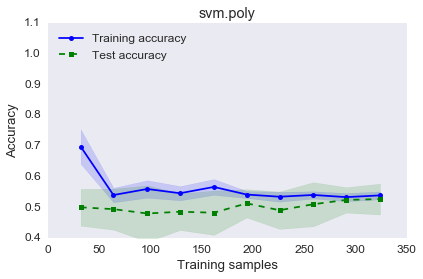

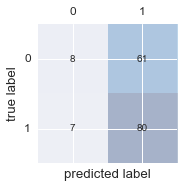

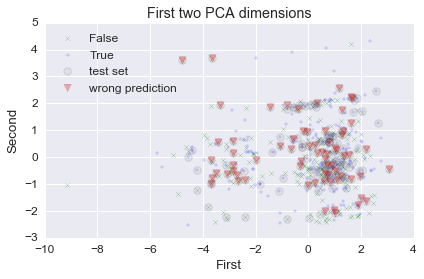

Method(n=11): svm.rbf 
Training accuracy: 0.562
Test  accuracy: 0.564


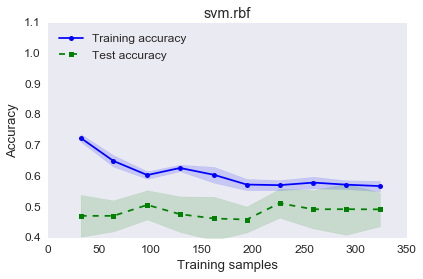

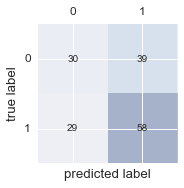

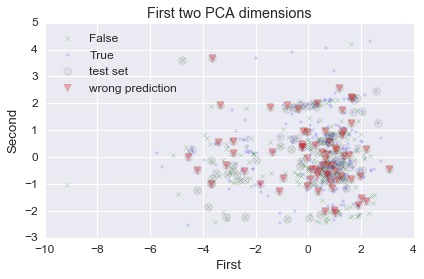

Method(n=11): svm.sigmoid 
Training accuracy: 0.496
Test  accuracy: 0.551


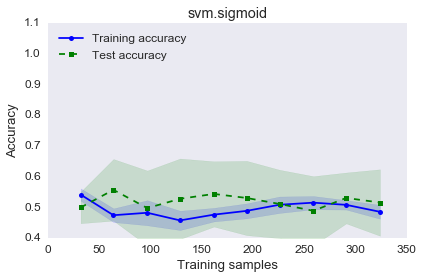

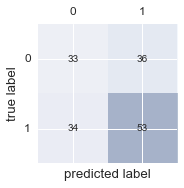

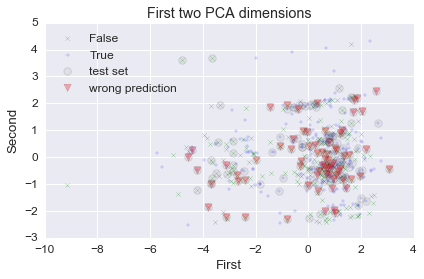

In [63]:
#Try logistic regression and SVM with only 2 components (n=2)
%matplotlib inline
from sklearn.pipeline import Pipeline
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.learning_curve import learning_curve


method = [
              ('logistic regression', LogisticRegression(random_state=1)),\
              ('svm.linear', svm.SVC(kernel='linear', gamma=0.2)),\
              ('svm.poly',svm.SVC(kernel='poly', gamma=0.2)),\
              ('svm.rbf',svm.SVC(kernel='rbf',gamma=0.2)),\
              ('svm.sigmoid',svm.SVC(kernel='sigmoid',gamma=0.2)),\

              ]
X_std = stdsc.transform(X)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
X_pca = pca.transform(X_std)


for i in range(len(method)):
    pipe_cl = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    method[i]])

    pipe_cl.fit(X_train, y_train)
    print('Method(n=11): %s ' % method[i][0])
    print('Training accuracy: %.3f\nTest  accuracy: %.3f' % (pipe_cl.score(X_train, y_train),pipe_cl.score(X_test, y_test)))
    
    learning_curve_plot(pipe_cl, X_train, y_train, method[i][0])
    
    y_pred = pipe_cl.predict(X_test)

    #plot confusion matrix
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')
    wrong_y = (y_test!=y_pred)

    fig = plt.figure()      
    markers = ('x',  '+')
    colors = ('green',  'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    for idx, cl in enumerate(np.unique(y)):

        plt.scatter(x=X_pca[y == cl, 0], y=X_pca[y == cl, 1],
                alpha=0.5, c=cmap(idx),
                marker=markers[idx], label=cl)

    plt.scatter(X_test_pca[:, 0],
            X_test_pca[:, 1],
            c='grey',
            alpha=0.1,
            linewidths=1,
            marker='o',
            s=55, label='test set')

    plt.scatter(x=X_test_pca[wrong_y==True,0],\
                y=X_test_pca[wrong_y==True,1],\
                c='red',
                alpha=0.3,
                marker='v',
                s=55, label='wrong prediction')


    plt.title('First two PCA dimensions')
    plt.xlabel('First')
    plt.ylabel('Second')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()



Comparing the results above, we can see that some methods (svm.poly and svm.rbf) do have a much higher training accuracies with n=11 than n=2 while the test accuracies of all methods do not have an obvious difference between n=11 and n=2, generally around 0.5 to 0.6.

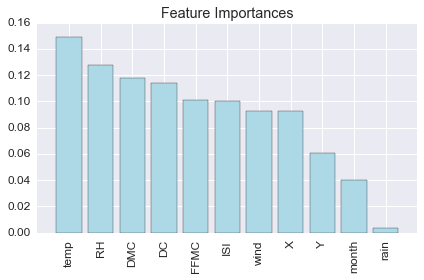

[ 0.14935722  0.1280545   0.11759765  0.11432912  0.10071045  0.10008146
  0.09281338  0.09269931  0.06072502  0.04009978  0.00353211]


In [50]:
#Find feature importance
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0)
forest.fit(X_train_std, y_train)
importances = forest.feature_importances_
feat_labels = fires.columns[0:-1]
indices = np.argsort(importances)[::-1]

# plot of feature importances
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        color='lightblue',
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

print(importances[indices])

In [64]:
#Choose only two most important features for further analysis
x=X.loc[:,['temp','RH']]
y=(fires['area'].values > 0)



x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(x_train)
x_test_std = stdsc.transform(x_test)


In [52]:
#Simplize some notations
from sklearn.tree import DecisionTreeClassifier

decision = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=5,
                              random_state=0)

from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, 
                                random_state=0)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

from sklearn.ensemble import ExtraTreesClassifier

extra =  ExtraTreesClassifier(criterion='entropy', 
                              max_depth=5,
                              random_state=0)

from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(base_estimator=decision,
                         n_estimators=10, 
                         learning_rate=0.5,
                         random_state=0)

from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier(max_depth=5,
                              random_state=0)

from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=decision,
                        n_estimators=10, 
                        max_samples=10, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1)

from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()

from sklearn.ensemble import VotingClassifier

vote = VotingClassifier(estimators=[('decision', decision), ('extra', extra)], voting='soft', weights=[1,1])


In [53]:
#Define plot function
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def pl(X,y,cl):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y_test))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.05),
                           np.arange(x2_min, x2_max, 0.05))
    
    Z = cl.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(X[y == l, 0], X[y == l, 1], alpha=0.68,
                    c=c, label=l, marker=m)

    plt.scatter(x=X[wrong_y==True,0],y=X[wrong_y==True,1],
                c='black',
                alpha=1,
                marker='v',
                s=66, label='Wrong prediction')

    
    plt.xlabel('temp')
    plt.ylabel('RH')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()



Method: Decision Tree 
Training accuracy: 0.607
Test  accuracy: 0.635


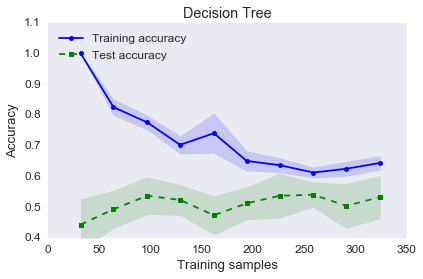

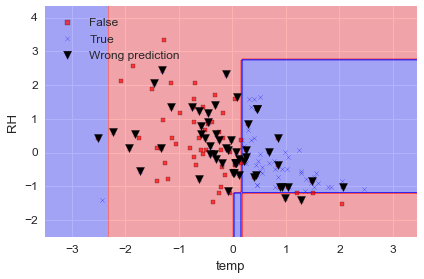

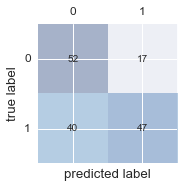

Method: Random Forest 
Training accuracy: 0.947
Test  accuracy: 0.558


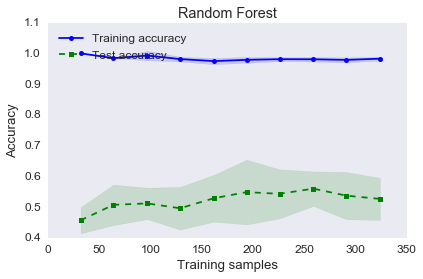

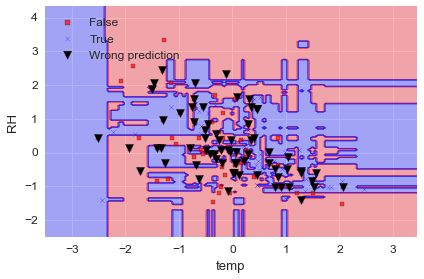

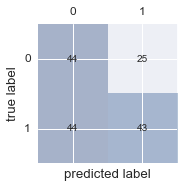

Method: KNN 
Training accuracy: 0.665
Test  accuracy: 0.506


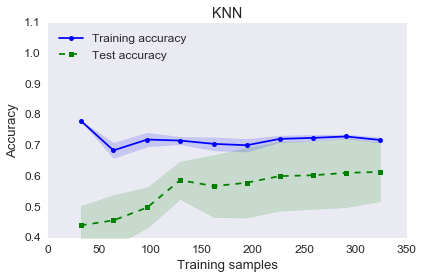

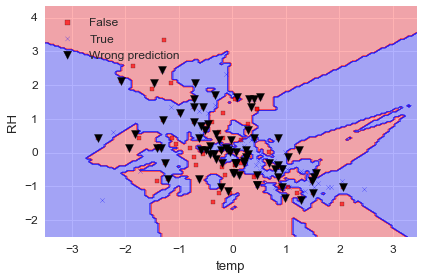

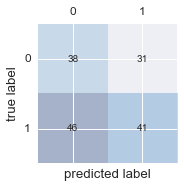

Method: Extra Trees 
Training accuracy: 0.704
Test  accuracy: 0.564


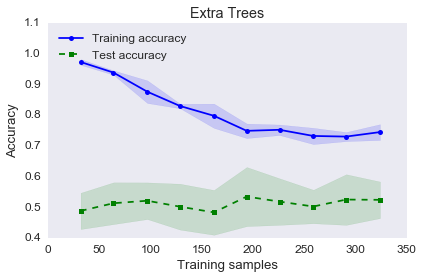

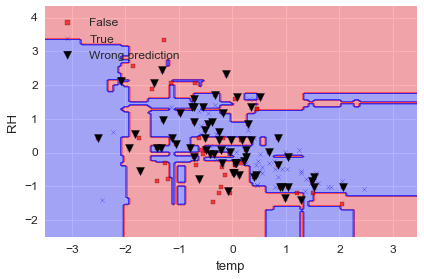

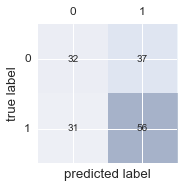

Method: AdaBoost 
Training accuracy: 0.889
Test  accuracy: 0.500


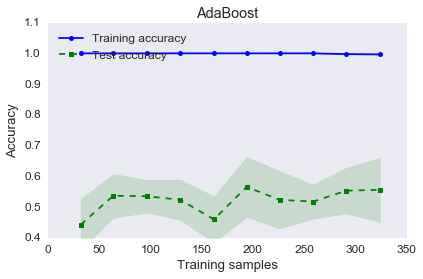

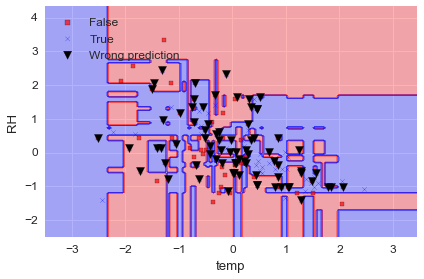

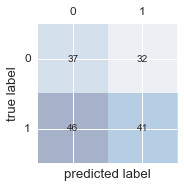

Method: Gradient Boosting 
Training accuracy: 0.958
Test  accuracy: 0.538


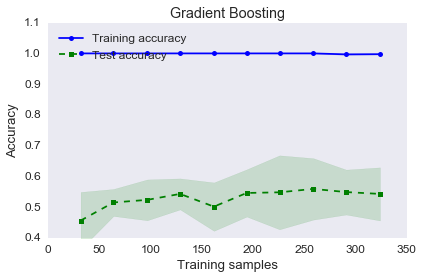

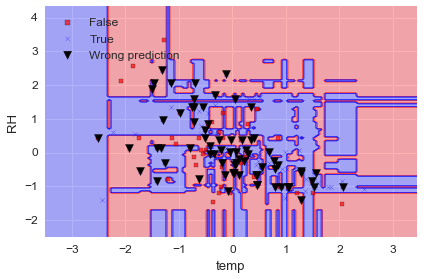

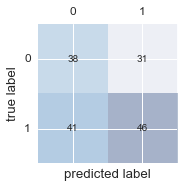

Method: Bagging 
Training accuracy: 0.507
Test  accuracy: 0.526


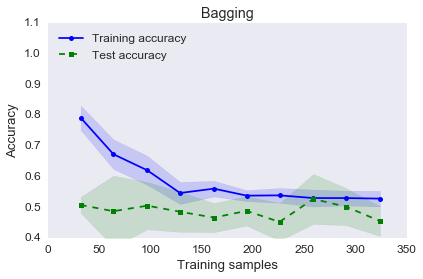

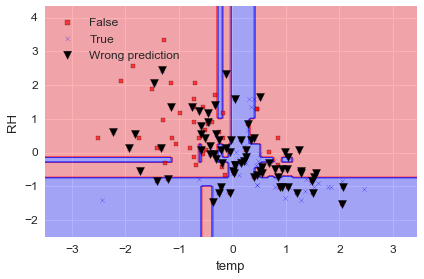

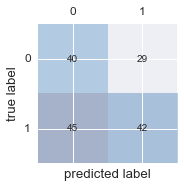

Method: Navie Bayes 
Training accuracy: 0.565
Test  accuracy: 0.494


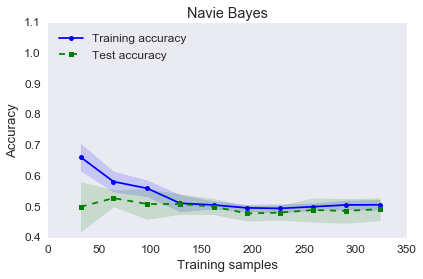

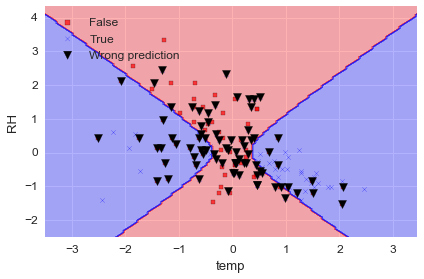

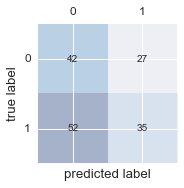

Method: Voting 
Training accuracy: 0.665
Test  accuracy: 0.603


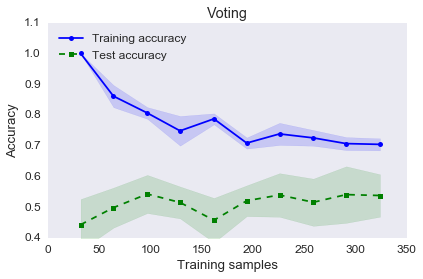

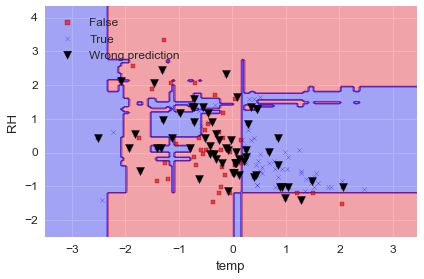

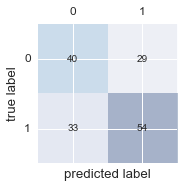

In [68]:
#Try some Classifier methods
%matplotlib inline
for clf, md in zip([decision, random, knn, extra, adaboost, gradient, bagging, bayes, vote],\
                   ['Decision Tree','Random Forest', 'KNN','Extra Trees','AdaBoost','Gradient Boosting','Bagging','Navie Bayes','Voting']):
   
        clf.fit(x_train_std, y_train)
    
        y_train_pred = clf.predict(x_train_std)
        y_test_pred = clf.predict(x_test_std)
    
        print('Method: %s ' % md)
        print('Training accuracy: %.3f\nTest  accuracy: %.3f' % (accuracy_score(y_train, y_train_pred),accuracy_score(y_test, y_test_pred)))

        learning_curve_plot(clf, X_train, y_train, md)
        
        y_pred=clf.predict(x_test_std)
        wrong_y = (y_test!=y_pred)

        pl(x_test_std,y_test,clf)
        
        #plot confusion matrix
        confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
        fig, ax = plt.subplots(figsize=(2.5, 2.5))
        ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
        for i in range(confmat.shape[0]):
            for j in range(confmat.shape[1]):
                ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
     
        plt.xlabel('predicted label')
        plt.ylabel('true label')
        plt.show()


Conclusion: Comparing the results above, Random Forest has the highest test accuracy (0.635) while KNN method will have the best test results as the number of the training samples increases.